<a href="https://colab.research.google.com/github/igor531205/applied_machine_learning_tasks/blob/main/hw5_aggregation_of_assessments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
!pip install -U -q crowd-kit

Standard libraries

In [ ]:
import numpy as np
import pandas as pd
import random as rnd

Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Algorithms DawidSkene and MajorityVote

In [ ]:
from crowdkit.aggregation import DawidSkene, MajorityVote

Pandas display options

In [ ]:
pd.options.display.max_columns = None

# Aggregation of assessor ratings in the search quality assessment problem

In [ ]:
num_tasks = 10000
num_workers = 1000
best_workers = 50
labels = [0, 1, 2, 3, 4]
probabilities_labels = [0.01, 0.18, 0.7, 0.1, 0.01]
probabilities_workers_assessment_same = [0.9, 0.1]
probabilities_choice_worker = [0.9, 0.1]
probabilities_choice_between_workers = [0.5, 0.5]
worker_numbers = np.random.lognormal(mean=5, sigma=0.7, size=num_workers)
worker_numbers = np.round(worker_numbers).astype(int)
worker_numbers = np.clip(worker_numbers, 1, num_workers)

Creating a dataset

In [ ]:
data = []
for i in range(num_tasks):
  workers_assessment_same = [True, False]
  choice_worker = [True, False]
  first_worker_number = rnd.choice(worker_numbers)
  first_worker_assessment = rnd.choices(labels, weights=probabilities_labels, k=1)[0]
  is_workers_assessment_same = rnd.choices(
      workers_assessment_same,
      weights=probabilities_workers_assessment_same,
      k=1
      )[0]
  data.append({'task': i, 'worker': first_worker_number, 'label': first_worker_assessment})

  second_worker_number = rnd.choice(worker_numbers)
  while first_worker_number == second_worker_number:
    second_worker_number = rnd.choice(worker_numbers)
  if is_workers_assessment_same:
    second_worker_assessment = first_worker_assessment
  else:
    second_worker_assessment = rnd.choices(labels, weights=probabilities_labels, k=1)[0]
  data.append({'task': i, 'worker': second_worker_number, 'label': second_worker_assessment})

  if first_worker_assessment != second_worker_assessment:
    start = num_workers + 1
    end = num_workers + best_workers
    best_worker_number = rnd.randint(start, end)

    is_some_worker_choice = rnd.choices(choice_worker, weights=probabilities_choice_worker, k=1)[0]
    if is_some_worker_choice:
      is_first_worker_choice = rnd.choices(choice_worker, weights=probabilities_choice_between_workers, k=1)[0]
      if is_first_worker_choice:
        best_worker_assessment = first_worker_assessment
      else:
        best_worker_assessment = second_worker_assessment
    else:
      best_worker_assessment = rnd.choices(labels, weights=probabilities_labels, k=1)[0]
    data.append({'task': i, 'worker': best_worker_number, 'label': best_worker_assessment})

df = pd.DataFrame(data)
df.head()

task  worker  label
0     0     131      2
1     0      65      2
2     1     159      2
3     1      49      2
4     2      45      2

Visualization dataset

In [ ]:
df.T

0      1      2      3      4      5      6      7      8      9      \
task        0      0      1      1      2      2      3      3      4      4   
worker    131     65    159     49     45    198    303    249    282    343   
label       2      2      2      2      2      2      2      2      2      2   

        10     11     12     13     14     15     16     17     18     19     \
task        5      5      6      6      7      7      8      8      9      9   
worker     45    188     76    265     98     66    186    165    326     73   
label       2      2      2      2      2      2      3      3      3      3   

        20     21     22     23     24     25     26     27     28     29     \
task       10     10     11     11     12     12     13     13     14     14   
worker     85    125    222    309    476    134     96    142    307     31   
label       2      2      2      2      2      2      2      2      2      2   

        30     31     32     33     34     35     36     37     38     39     \
task       15     15     16     16     17     17     18     18     19     19   
worker    326     66    347    240     61    132    240     94     98    167   
label       2      2      2      2      1      1      2      2      1      1   

        40     41     42     43     44     45     46     47     48     49     \
task       20     20     21     21     22     22     23     23     24     24   
worker    292    141     75    177    119     58     79    317    303     75   
label       1      1      2      2      2      2      1      1      2      2   

        50     51     52     53     54     55     56     57     58     59     \
task       25     25     26     26     27     27     28     28     29     29   
worker    283    340    246   1000    137     78    108     55     97     63   
label       2      2      2      2      2      2      2      2      1      1   

        60     61     62     63     64     65     66     67     68     69     \
task       30     30     31     31     32     32     33     33     34     34   
worker    134     67     72     84     59    135    182    141    114     49   
label       2      2      2      2      2      2      2      2      1      1   

        70     71     72     73     74     75     76     77     78     79     \
task       35     35     36     36     37     37     38     38     39     39   
worker    133    142     26     53     79    352    176    252    268     57   
label       2      2      2      2      2      2      2      2      2      2   

        80     81     82     83     84     85     86     87     88     89     \
task       40     40     41     41     42     42     43     43     44     44   
worker    135    326    112    155     82     51     62    441     45    327   
label       2      2      2      2      2      2      2      2      2      2   

        90     91     92     93     94     95     96     97     98     99     \
task       45     45     46     46     47     47     48     48     49     49   
worker    340    198    109     99    654    271    270    489    129     91   
label       2      2      2      2      2      2      2      2      1      2   

        100    101    102    103    104    105    106    107    108    109    \
task       49     50     50     51     51     52     52     53     53     53   
worker   1009     94     53    112     47    140    222     63     94   1018   
label       2      2      2      2      2      2      2      3      2      2   

        110    111    112    113    114    115    116    117    118    119    \
task       54     54     55     55     56     56     57     57     58     58   
worker     67     78    113    185    287    382    255    164     72     44   
label       2      2      3      3      2      2      2      2      1      1   

        120    121    122    123    124    125    126    127    128    129    \
task       59     59     60     60     61     61     62     62     63     63

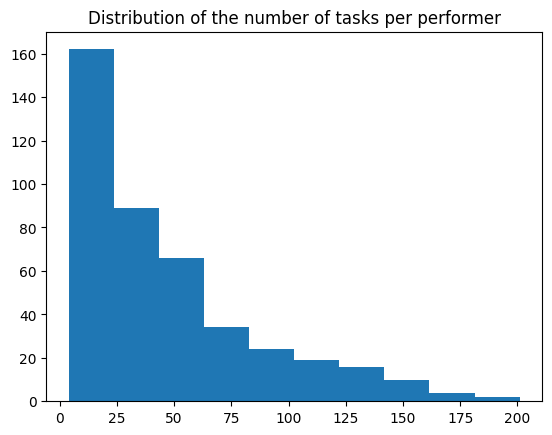

In [ ]:
worker_task_counts = df['worker'].value_counts()
plt.hist(worker_task_counts)
plt.title('Distribution of the number of tasks per performer')
plt.show()

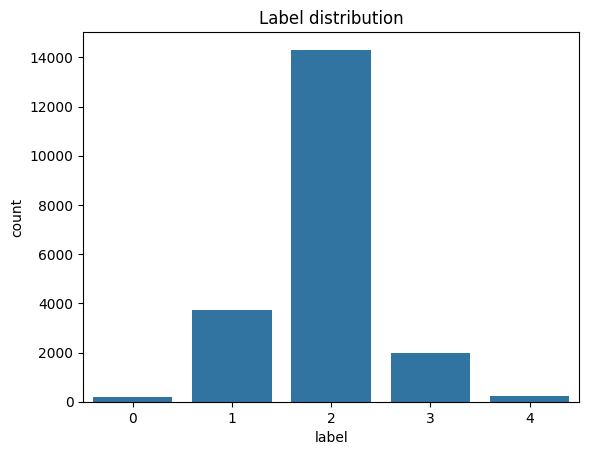

In [ ]:
ax = sns.countplot(x='label', data=df)
plt.title('Label distribution')
plt.show()

Algorithms DawidSkene and MajorityVote

In [ ]:
agg_data = df.groupby('task').agg(list)

mv = MajorityVote()
mv_result = mv.fit_predict(df)

ds = DawidSkene()
ds_result = ds.fit_predict(df)

results_df = pd.DataFrame({
    'task': mv_result.index,
    'majority_vote': mv_result.values,
    'dawid_skene': ds_result.values
})
results_df.T

0     1     2     3     4     5     6     7     8     9     \
task              0     1     2     3     4     5     6     7     8     9   
majority_vote     2     2     2     2     2     2     2     2     3     3   
dawid_skene       2     2     2     2     2     2     2     2     3     3   

               10    11    12    13    14    15    16    17    18    19    \
task             10    11    12    13    14    15    16    17    18    19   
majority_vote     2     2     2     2     2     2     2     1     2     1   
dawid_skene       2     2     2     2     2     2     2     1     2     1   

               20    21    22    23    24    25    26    27    28    29    \
task             20    21    22    23    24    25    26    27    28    29   
majority_vote     1     2     2     1     2     2     2     2     2     1   
dawid_skene       1     2     2     1     2     2     2     2     2     1   

               30    31    32    33    34    35    36    37    38    39    \
task             30    31    32    33    34    35    36    37    38    39   
majority_vote     2     2     2     2     1     2     2     2     2     2   
dawid_skene       2     2     2     2     1     2     2     2     2     2   

               40    41    42    43    44    45    46    47    48    49    \
task             40    41    42    43    44    45    46    47    48    49   
majority_vote     2     2     2     2     2     2     2     2     2     2   
dawid_skene       2     2     2     2     2     2     2     2     2     2   

               50    51    52    53    54    55    56    57    58    59    \
task             50    51    52    53    54    55    56    57    58    59   
majority_vote     2     2     2     2     2     3     2     2     1     2   
dawid_skene       2     2     2     2     2     3     2     2     1     2   

               60    61    62    63    64    65    66    67    68    69    \
task             60    61    62    63    64    65    66    67    68    69   
majority_vote     1     2     2     1     1     2     1     2     2     3   
dawid_skene       1     2     2     1     1     2     1     2     2     3   

               70    71    72    73    74    75    76    77    78    79    \
task             70    71    72    73    74    75    76    77    78    79   
majority_vote     2     1     2     3     2     2     2     0     1     3   
dawid_skene       2     2     2     3     2     2     2     0     1     3   

               80    81    82    83    84    85    86    87    88    89    \
task             80    81    82    83    84    85    86    87    88    89   
majority_vote     2     2     2     2     2     2     1     2     2     1   
dawid_skene       2     2     2     2     2     2     1     2     2     2   

               90    91    92    93    94    95    96    97    98    99    \
task             90    91    92    93    94    95    96    97    98    99   
majority_vote     1     2     2     2     2     2     2     2     2     2   
dawid_skene       1     2     2     2     2     2     2     2     2     2   

               100   101   102   103   104   105   106   107   108   109   \
task            100   101   102   103   104   105   106   107   108   109   
majority_vote     2     2     2     2     2     2     3     2     2     3   
dawid_skene       2     2     2     2     2     2     3     2     2     3   

               110   111   112   113   114   115   116   117   118   119   \
task            110   111   112   113   114   115   116   117   118   119   
majority_vote     2     2     2     1     2     2     2     1     2     2   
dawid_skene       2     2     2     1     2     2     2     1     2     2   

               120   121   122   123   124   125   126   127   128   129   \
task            120   121   122   123   124   125   126   127   128   129   
majority_vote     2     2     2     2     2     2     1     2     1     2   
dawid_skene       2     2     2     2     2     2     1     2     1     2   

Algorithm discrepancies

In [ ]:
discrepancies = results_df[results_df['majority_vote'] != results_df['dawid_skene']]
merged_discrepancies = discrepancies.merge(agg_data.reset_index(), on='task', how='left')
merged_discrepancies.head()

task  majority_vote  dawid_skene            worker      label
0    71              1            2   [90, 199, 1030]  [1, 2, 1]
1    89              1            2  [182, 287, 1050]  [1, 2, 1]
2   232              3            2   [91, 503, 1024]  [2, 3, 3]
3   260              2            3    [84, 57, 1023]  [2, 3, 2]
4   264              2            1  [167, 206, 1017]  [1, 2, 2]

Majority Vote workers' skills

In [ ]:
mv_skills = mv.skills_.to_frame().T.round(2)
mv_skills

worker  20    21    23    24    25    26    27    28    30    31    32    \
skill   0.95   1.0  0.98  0.92  0.94   1.0   1.0   1.0   1.0   1.0   1.0   

worker  33    34    35    36    37    39    41    42    43    44    45    \
skill   0.98  0.98  0.98   1.0   1.0  0.98   1.0   1.0   1.0  0.97  0.98   

worker  46    47    48    49    50    51    52    53    54    55    56    \
skill   0.97  0.98  0.97  0.96  0.98   1.0  0.98   1.0  0.97  0.98   1.0   

worker  57    58    59    60    61    62    63    64    65    66    67    \
skill   0.95   1.0  0.99  0.98  0.98   1.0  0.97  0.98  0.98   1.0  0.98   

worker  69    70    71    72    73    74    75    76    77    78    79    \
skill   0.94  0.99  0.99  0.94  0.98  0.98  0.99  0.98  0.98  0.98  0.96   

worker  80    81    82    83    84    85    86    87    88    89    90    \
skill   0.97  0.97  0.98  0.96  0.99   1.0  0.99  0.99   1.0  0.96  0.95   

worker  91    92    93    94    95    96    97    98    99    100   101   \
skill   0.98  0.98  0.96  0.97  0.96   1.0  0.96  0.97   1.0  0.98  0.99   

worker  102   103   104   105   106   107   108   109   110   111   112   \
skill   0.93  0.97  0.96   1.0   1.0  0.98  0.98  0.98  0.97  0.98   1.0   

worker  113   114   115   116   117   118   119   120   121   122   123   \
skill   0.97  0.97  0.97  0.98  0.95  0.96  0.98   1.0  0.98  0.98   1.0   

worker  124   125   126   127   128   129   130   131   132   133   134   \
skill   0.99  0.95   1.0  0.97  0.97  0.96  0.97  0.96  0.94  0.98  0.99   

worker  135   136   137   138   139   140   141   142   143   144   145   \
skill    1.0  0.99  0.99   1.0  0.95  0.97   1.0  0.98  0.99   1.0  0.94   

worker  146   147   148   149   150   151   152   153   154   155   156   \
skill   0.97  0.97   1.0  0.95   1.0  0.99  0.98  0.99  0.98   1.0  0.98   

worker  157   158   159   160   161   162   163   164   165   166   167   \
skill   0.99  0.99  0.98  0.98  0.96   1.0  0.98   1.0  0.97   1.0  0.96   

worker  168   169   171   172   173   174   175   176   177   178   179   \
skill   0.96  0.97  0.96   1.0  0.93  0.97  0.94  0.98  0.93  0.98   1.0   

worker  180   181   182   183   184   185   186   187   188   189   190   \
skill    1.0  0.98   1.0  0.94  0.97   1.0  0.96   1.0  0.94   1.0   1.0   

worker  191   192   193   194   195   196   197   198   199   200   201   \
skill    1.0  0.97  0.94   0.9   1.0  0.98  0.96  0.98  0.96  0.99   1.0   

worker  202   203   204   205   206   207   208   209   210   211   212   \
skill   0.97   1.0   1.0   1.0  0.97   1.0  0.96   1.0  0.98   1.0   1.0   

worker  213   214   215   216   217   218   219   220   221   222   223   \
skill   0.99  0.99  0.97  0.98   1.0   1.0   1.0   1.0   1.0  0.98   1.0   

worker  224   226   227   229   230   233   234   235   236   237   238   \
skill    1.0  0.92   1.0  0.96  0.95   1.0  0.98  0.93   1.0   1.0   1.0   

worker  239   240   242   243   245   246   247   249   250   251   252   \
skill   0.98   1.0  0.97  0.96   1.0  0.96  0.98  0.98   1.0  0.95  0.98   

worker  254   255   256   257   258   259   261   263   264   265   266   \
skill   0.96   1.0  0.99  0.97   1.0  0.85  0.95  0.97  0.95   1.0  0.93   

worker  268   269   270   271   272   273   274   277   278   279   281   \
skill    1.0   1.0  0.96  0.97   1.0   1.0  0.99   1.0  0.96  0.91   1.0   

worker  282   283   284   287   288   289   290   291   292   294   295   \
skill   0.98   1.0  0.96  0.98   1.0  0.98  0.93  0.94  0.99   1.0   1.0   

worker  296   298   300   301   302   303   304   305   306   307   309   \
skill   0.97  0.98   1.0  0.94  0.95  0.97  0.95   1.0  0.95  0.98  0.94   

worker  310   311   312   313   315   316   317   318   320   321   323   \
skill    1.0  0.97  0.96  0.97   1.0   1.0  0.94  0.95  0.98   1.0   1.0   

worker  326   327   329   330   331   332   334   335   336   340   341   \
skill   0.95  0.98   1.0   1.0   1.0  0.93   1.0  0.96   1.0   1.0   1.0   

worker  342   343   34

Dawid-Skene workers' error matrices

In [ ]:
ds_errors = ds.errors_
ds_errors = ds_errors.reindex(columns=labels, fill_value=0)
workers = ds_errors.index.get_level_values('worker').unique()
new_index = pd.MultiIndex.from_product([workers, labels], names=['worker', 'label'])
ds_errors = ds_errors.reindex(new_index, fill_value=0).round(2).T.sort_index(axis=1)
ds_errors

worker 20                         21                          23          \
label     0     1     2    3    4    0     1     2     3    4    0     1   
0       1.0  0.00  0.00  0.0  0.0  1.0  0.00  0.00  0.00  0.0  0.0  0.02   
1       0.0  0.81  0.19  0.0  0.0  0.1  0.90  0.00  0.00  0.0  0.0  0.85   
2       0.0  0.00  1.00  0.0  0.0  0.0  0.00  1.00  0.00  0.0  0.0  0.00   
3       0.0  0.00  0.00  1.0  0.0  0.0  0.00  0.00  1.00  0.0  0.0  0.00   
4       0.0  0.06  0.94  0.0  0.0  0.0  0.61  0.14  0.26  0.0  0.0  0.00   

worker                  24                          25                      \
label      2     3    4    0     1     2     3    4    0     1     2     3   
0       0.23  0.74  0.0  0.0  0.23  0.44  0.32  0.0  0.0  0.09  0.59  0.01   
1       0.00  0.15  0.0  0.0  0.85  0.15  0.00  0.0  0.0  0.92  0.08  0.00   
2       1.00  0.00  0.0  0.0  0.06  0.94  0.00  0.0  0.0  0.02  0.96  0.03   
3       0.33  0.67  0.0  0.0  0.00  0.00  1.00  0.0  0.0  0.20  0.15  0.65   
4       0.00  0.00  1.0  0.0  0.01  0.91  0.08  0.0  0.0  0.00  0.00  0.00   

worker      26                         27                          28         \
label     4    0    1     2     3    4    0    1     2     3     4    0    1   
0       0.3  0.0  0.0  0.65  0.35  0.0  0.0  0.0  0.01  0.02  0.98  0.0  0.0   
1       0.0  0.0  1.0  0.00  0.00  0.0  0.0  1.0  0.00  0.00  0.00  0.0  1.0   
2       0.0  0.0  0.0  1.00  0.00  0.0  0.0  0.0  1.00  0.00  0.00  0.0  0.0   
3       0.0  0.0  0.0  0.16  0.84  0.0  0.0  0.0  0.00  1.00  0.00  0.0  0.0   
4       1.0  0.0  0.0  0.00  0.00  1.0  0.0  0.0  0.00  0.00  1.00  0.0  0.0   

worker                   30                          31                      \
label      2     3     4    0     1     2     3    4    0     1     2     3   
0       0.03  0.01  0.97  1.0  0.00  0.00  0.00  0.0  0.0  0.04  0.05  0.91   
1       0.00  0.00  0.00  0.0  1.00  0.00  0.00  0.0  0.0  1.00  0.00  0.00   
2       1.00  0.00  0.00  0.0  0.00  1.00  0.00  0.0  0.0  0.00  1.00  0.00   
3       0.00  1.00  0.00  0.0  0.00  0.00  1.00  0.0  0.0  0.00  0.00  1.00   
4       0.00  0.00  1.00  0.0  0.17  0.15  0.68  0.0  0.0  0.39  0.23  0.38   

worker      32                          33                           34    \
label     4    0     1     2    3     4    0     1     2     3     4    0   
0       0.0  0.0  0.01  0.04  0.0  0.96  0.0  0.00  0.09  0.03  0.88  0.0   
1       0.0  0.0  1.00  0.00  0.0  0.00  0.0  0.91  0.09  0.00  0.00  0.0   
2       0.0  0.0  0.00  1.00  0.0  0.00  0.0  0.00  1.00  0.00  0.00  0.0   
3       0.0  0.0  0.02  0.98  0.0  0.00  0.0  0.00  0.12  0.88  0.00  0.0   
4       0.0  0.0  0.00  0.00  0.0  1.00  0.0  0.00  0.00  0.00  1.00  0.0   

worker                         35                           36                \
label      1     2     3     4    0     1     2     3     4    0     1     2   
0       0.00  0.04  0.60  0.36  0.0  0.06  0.64  0.08  0.22  0.0  0.31  0.24   
1       0.87  0.13  0.00  0.00  0.0  0.95  0.05  0.00  0.00  0.0  1.00  0.00   
2       0.00  0.98  0.02  0.00  0.0  0.00  1.00  0.00  0.00  0.0  0.00  0.99   
3       0.00  0.00  1.00  0.00  0.0  0.00  0.00  1.00  0.00  0.0  0.00  0.00   
4       0.00  0.00  0.00  1.00  0.0  0.00  0.00  0.00  1.00  0.0  0.41  0.45   

worker             37                          39                           \
label      3    4     0     1     2     3    4    0    1     2     3     4   
0       0.45  0.0  1.00  0.00  0.00  0.00  0.0  0.0  0.0  0.30  0.15  0.55   
1       0.00  0.0  0.00  1.00  0.00  0.00  0.0  0.0  1.0  0.00  0.00  0.00   
2       0.01  0.0  0.00  0.00  1.00  0.00  0.0  0.0  0.0  1.00  0.00  0.00   
3       1.00  0.0  0.00  0.00  0.00  1.00  0.0  0.0  0.0  0.14  0.86  0.00   
4       0.14  0.0  0.82  0.05  0.05  0.08  0.0  0.0  0.0  0.00  0.00  1.00   

worker 41                           42                         43          \
label     0     1     2     3    4     0     1     2    3    4    0     1   
0  

The worst assessors are listed

In [ ]:
best_workers_range = range(1001, 1051)
best_worker_data = df[df['worker'].isin(best_workers_range)]
merged_data = df.merge(best_worker_data[['task', 'label']], on='task', suffixes=('', '_best'))
merged_data = merged_data[merged_data['worker'] < 1001]
merged_data = merged_data.copy()
merged_data['discrepancy'] = merged_data['label'] != merged_data['label_best']
discrepancy_counts = merged_data.groupby('worker')['discrepancy'].sum().reset_index()
discrepancy_counts.columns = ['worker', 'discrepancies']
bad_assessors = discrepancy_counts.sort_values(by='discrepancies', ascending=False).reset_index(drop=True).T
bad_assessors

0    1    2    3    4    5    6    7    8    9    10   11   \
worker         132   57   72  173   69   49  167  332  125   83   97  168   
discrepancies    9    8    7    6    6    5    5    5    5    5    5    4   

               12   13   14   15   16   17   18   19   20   21   22   23   \
worker         102  100   98  139   81  165   90   79  117  197  490   44   
discrepancies    4    4    4    4    4    4    4    4    4    4    4    4   

               24   25   26   27   28   29   30   31   32   33   34   35   \
worker         246  208  194  291  183  177  326  230  229   91   94  210   
discrepancies    4    4    4    4    4    4    3    3    3    3    3    3   

               36   37   38   39   40   41   42   43   44   45   46   47   \
worker         318  199  109  133  193  111  175  122  271  188  129  184   
discrepancies    3    3    3    3    3    3    3    3    3    3    3    3   

               48   49   50   51   52   53   54   55   56   57   58   59   \
worker         192  121  235   78   60  470   80   74   76  449   24   25   
discrepancies    3    3    3    3    3    3    3    3    3    3    3    3   

               60   61   62   63   64   65   66   67   68   69   70   71   \
worker         140  147  313  317  476  142  216  215  137  136   59  960   
discrepancies    2    2    2    2    2    2    2    2    2    2    2    2   

               72   73   74   75   76   77   78   79   80   81   82   83   \
worker          61  131  304  303  302  159   55  128  486  171  174  279   
discrepancies    2    2    2    2    2    2    2    2    2    2    2    2   

               84   85   86   87   88   89   90   91   92   93   94   95   \
worker          45  226  604  757  259  251  206   54   82   63   89  385   
discrepancies    2    2    2    2    2    2    2    2    2    2    2    2   

               96   97   98   99   100  101  102  103  104  105  106  107  \
worker          75   71  103  104   95   93   70  110   92   77   67  107   
discrepancies    2    2    2    2    2    2    2    2    2    2    2    2   

               108  109  110  111  112  113  114  115  116  117  118  119  \
worker         409  114  115  113  343  118  270  389  266  268  249  264   
discrepancies    2    2    2    2    2    2    1    1    1    1    1    1   

               120  121  122  123  124  125  126  127  128  129  130  131  \
worker         243  581  521  274  242  715  261  404  263  401  803  257   
discrepancies    1    1    1    1    1    1    1    1    1    1    1    1   

               132  133  134  135  136  137  138  139  140  141  142  143  \
worker         827  256  278  254  396  252  247  520  284  518  361  448   
discrepancies    1    1    1    1    1    1    1    1    1    1    1    1   

               144  145  146  147  148  149  150  151  152  153  154  155  \
worker         335  444  239  440  347  320  349  312  311  309  306  352   
discrepancies    1    1    1    1    1    1    1    1    1    1    1    1   

               156  157  158  159  160  161  162  163  164  165  166  167  \
worker         301  298  436  296  292  374  290  485  289  287  489  379   
discrepancies    1    1    1    1    1    1    1    1    1    1    1    1   

               168  169  170  171  172  173  174  175  176  177  178  179  \
worker         495  327  500  283  282  307   20  124  143  160   46  157   
discrepancies    1    1    1    1    1    1    1    1    1    1    1    1   

               180  181  182  183  184  185  186  187  188  189  190  191  \
worker         156  154  153  152  151   47  149  146  145   48  144   50   
discrepancies    1    1    1    1    1    1    1    1    1    1    1    1   

               192  193  194  195  196  197  198  199  200  201  202  203  \
worker         163   52  134  130  127  234  119  116  108   64   65  101   
discrepancies    1    1    1    1    1    1    1    1    1    1    1    1   

               204  205  206  207  208  209  210  211  212  213  214  2

Output of the error matrix of the worst assessors

In [ ]:
bad_assessors_ids = bad_assessors.loc['worker'].tolist()
bad_assessors_errors = ds_errors[bad_assessors_ids]
bad_assessors_errors

worker  132                          57                         72          \
label      0     1     2     3    4     0     1     2    3    4    0     1   
0       1.00  0.00  0.00  0.00  0.0  0.97  0.03  0.00  0.0  0.0  1.0  0.00   
1       0.00  0.84  0.16  0.00  0.0  0.00  0.99  0.01  0.0  0.0  0.0  1.00   
2       0.01  0.01  0.96  0.02  0.0  0.00  0.02  0.98  0.0  0.0  0.0  0.04   
3       0.00  0.00  0.01  0.99  0.0  0.01  0.01  0.09  0.9  0.0  0.0  0.03   
4       0.00  0.00  0.00  0.00  1.0  0.00  0.00  0.00  0.0  1.0  0.0  0.00   

worker                    173                         69                      \
label      2     3     4     0     1     2     3    4    0     1     2     3   
0       0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.0  0.0  0.60  0.36  0.03   
1       0.00  0.00  0.00  0.00  0.98  0.00  0.02  0.0  0.0  0.91  0.03  0.05   
2       0.96  0.00  0.00  0.00  0.08  0.92  0.00  0.0  0.0  0.01  0.99  0.00   
3       0.10  0.86  0.01  0.00  0.00  0.00  1.00  0.0  0.0  0.04  0.12  0.84   
4       0.00  0.00  1.00  0.31  0.23  0.08  0.38  0.0  0.0  0.00  1.00  0.00   

worker      49                           167                         332   \
label     4    0     1     2     3     4    0     1     2     3    4    0   
0       0.0  0.0  0.00  1.00  0.00  0.00  0.0  0.54  0.41  0.04  0.0  0.0   
1       0.0  0.0  1.00  0.00  0.00  0.00  0.0  0.90  0.10  0.00  0.0  0.0   
2       0.0  0.0  0.01  0.99  0.00  0.00  0.0  0.00  1.00  0.00  0.0  0.0   
3       0.0  0.0  0.16  0.00  0.84  0.00  0.0  0.00  0.23  0.77  0.0  0.0   
4       0.0  0.0  0.00  0.35  0.33  0.33  0.0  0.00  0.00  0.00  1.0  0.0   

worker                        125                           83                \
label      1     2     3    4    0     1     2     3     4     0     1     2   
0       0.09  0.44  0.46  0.0  0.0  0.21  0.46  0.33  0.00  1.00  0.00  0.00   
1       0.79  0.21  0.00  0.0  0.0  1.00  0.00  0.00  0.00  0.00  0.86  0.14   
2       0.02  0.96  0.02  0.0  0.0  0.02  0.98  0.00  0.00  0.00  0.00  1.00   
3       0.00  0.00  1.00  0.0  0.0  0.00  0.17  0.78  0.05  0.00  0.00  0.09   
4       0.31  0.54  0.15  0.0  0.0  0.00  0.00  0.00  1.00  0.06  0.07  0.38   

worker            97                          168                          \
label      3    4    0     1     2     3    4    0     1     2     3    4   
0       0.00  0.0  1.0  0.00  0.00  0.00  0.0  1.0  0.00  0.00  0.00  0.0   
1       0.00  0.0  0.0  0.95  0.05  0.00  0.0  0.0  0.89  0.11  0.00  0.0   
2       0.00  0.0  0.0  0.00  0.99  0.01  0.0  0.0  0.00  0.99  0.01  0.0   
3       0.91  0.0  0.0  0.00  0.00  1.00  0.0  0.0  0.00  0.14  0.86  0.0   
4       0.49  0.0  0.0  0.00  1.00  0.00  0.0  0.0  0.00  0.00  0.00  1.0   

worker  102                         100                          98          \
label      0     1     2     3    4    0     1     2     3    4     0     1   
0       1.00  0.00  0.00  0.00  0.0  1.0  0.00  0.00  0.00  0.0  1.00  0.00   
1       0.00  0.77  0.23  0.00  0.0  0.0  0.88  0.06  0.06  0.0  0.00  0.99   
2       0.00  0.00  1.00  0.00  0.0  0.0  0.00  1.00  0.00  0.0  0.00  0.00   
3       0.00  0.00  0.12  0.88  0.0  0.0  0.00  0.00  1.00  0.0  0.00  0.00   
4       0.59  0.05  0.33  0.03  0.0  0.0  0.00  0.00  0.00  1.0  0.13  0.02   

worker                  139                          81                     \
label      2     3    4    0     1     2     3     4    0     1     2    3   
0       0.00  0.00  0.0  0.0  0.16  0.72  0.12  0.00  0.0  0.00  1.00  0.0   
1       0.01  0.00  0.0  0.0  0.96  0.04  0.00  0.00  0.0  0.97  0.03  0.0   
2       0.99  0.00  0.0  0.0  0.00  1.00  0.00  0.00  0.0  0.02  0.98  0.0   
3       0.04  0.96  0.0  0.0  0.00  0.04  0.96  0.00  0.0  0.00  0.00  1.0   
4       0.79  0.07  0.0  0.0  0.00  0.67  0.00  0.33  0.0  0.00  0.00  0.0   

worker      165                           90                          79    \
label     4    0     1     2     3     4     0     1     2     3    4   

Percentage of matching answers

In [ ]:
matched = (results_df['majority_vote'] == results_df['dawid_skene']).sum()
total = len(results_df)
matching_ratio = matched / total
matching_ratio

0.9936

David-Skeen distribution of aggregate estimates

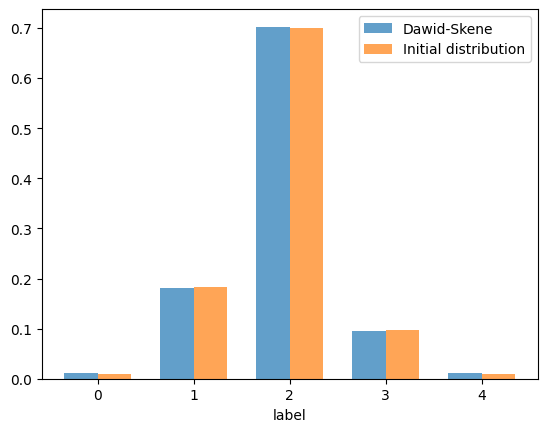

In [ ]:
ds_distribution = results_df['dawid_skene'].value_counts(normalize=True).sort_index()
initial_distribution = df['label'].value_counts(normalize=True).sort_index()
index = np.arange(len(ds_distribution))
bar_width = 0.35
plt.bar(index - bar_width/2, ds_distribution.values, bar_width, alpha=0.7, label='Dawid-Skene')
plt.bar(index + bar_width/2, initial_distribution.values, bar_width, alpha=0.7, label='Initial distribution')
plt.xlabel('label')
plt.xticks(index, ds_distribution.index)
plt.legend()
plt.show()

Class where David-Skeen doesn't agree with Majority Vote

In [ ]:
high_uncertainty_discrepancies = merged_discrepancies[merged_discrepancies['label'].apply(lambda x: len(set(x)) > 1)]
high_uncertainty_discrepancies.head(5)

task  majority_vote  dawid_skene            worker      label
0    71              1            2   [90, 199, 1030]  [1, 2, 1]
1    89              1            2  [182, 287, 1050]  [1, 2, 1]
2   232              3            2   [91, 503, 1024]  [2, 3, 3]
3   260              2            3    [84, 57, 1023]  [2, 3, 2]
4   264              2            1  [167, 206, 1017]  [1, 2, 2]